# Stem_graphic

For this demonstration, we will import stem_graphic along with some helpers, such as a list of French stopwords (common words we typically want to avoid in our models and exploratory analysis). Stemgraphic also has english (EN) and spanish (ES) stopwords built-in. Other lists can also be used.

In [1]:
%matplotlib inline
from stemgraphic.alpha import stem_graphic
from stemgraphic.helpers import APOSTROPHE
from stemgraphic.stopwords import VOYELLES, FR

The source of data will be "Arsene Lupin contre Herlock Sholmes, La lampe Juive" by Maurice Leblanc, in French. We load the unprocessed text directly from disk.

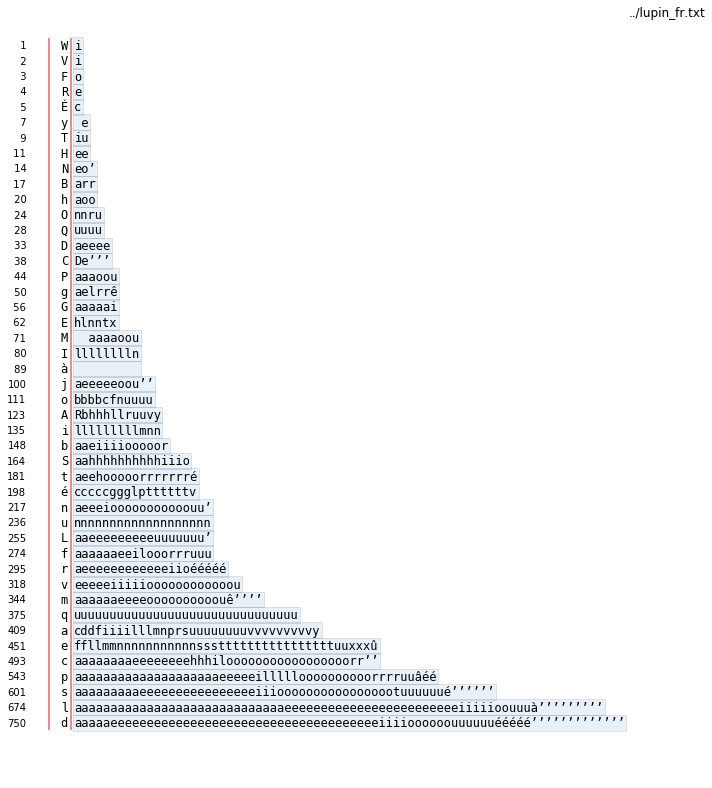

In [2]:
fig, ax, df = stem_graphic('../lupin_fr.txt', figure_only=False)

stem_graphic expects a list of words in some form. df from stem_graphic above has stem and leaf and ngrams so we select df.word.

Reverse=True allows us to look at word endings, stem is last letter, and leaves the letter preceding it

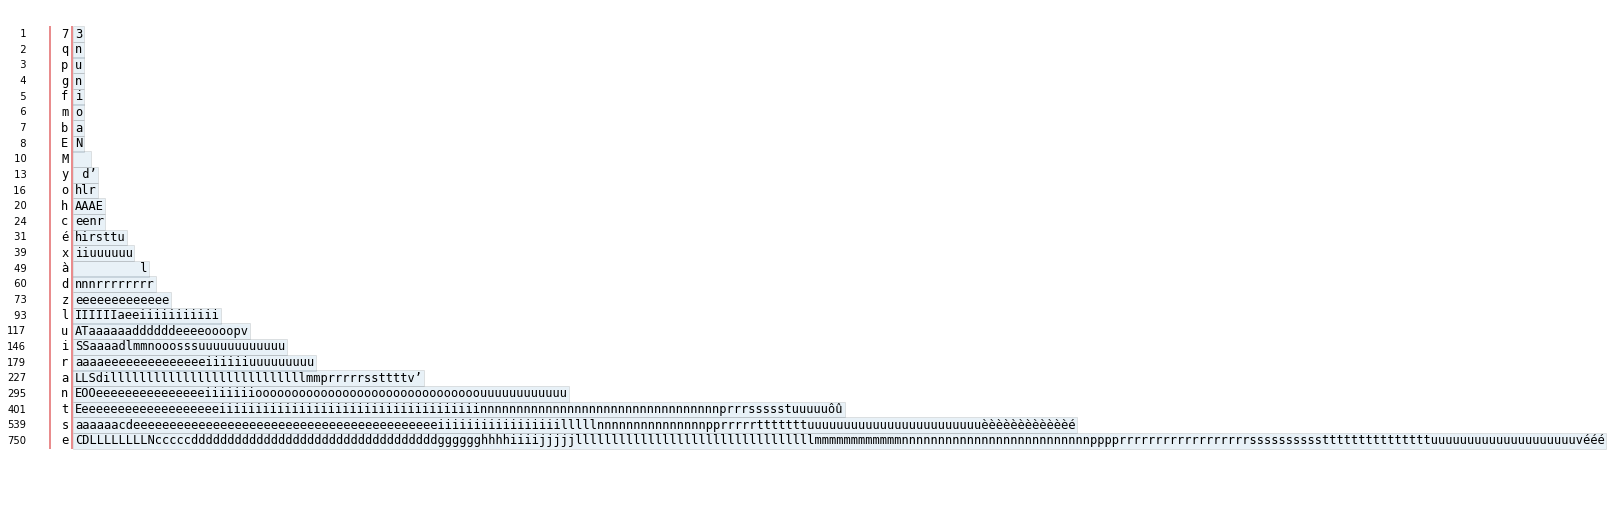

In [3]:
_,_, df2 = stem_graphic(df.word, reverse=True, figure_only=False);

Quite interesting to see the inversion of the shape of the distribution...

In [4]:
df2.head()  # Oh, the fun times! C'est kazy du verlan...

,index,word,stem,leaf,ngram
0,267,sèmlohS,s,è,sè
1,362,ed,e,d,ed
2,495,rus,r,u,ru
3,217,dnanidreF-tniaS,d,n,dn
4,420,tpes,t,p,tp


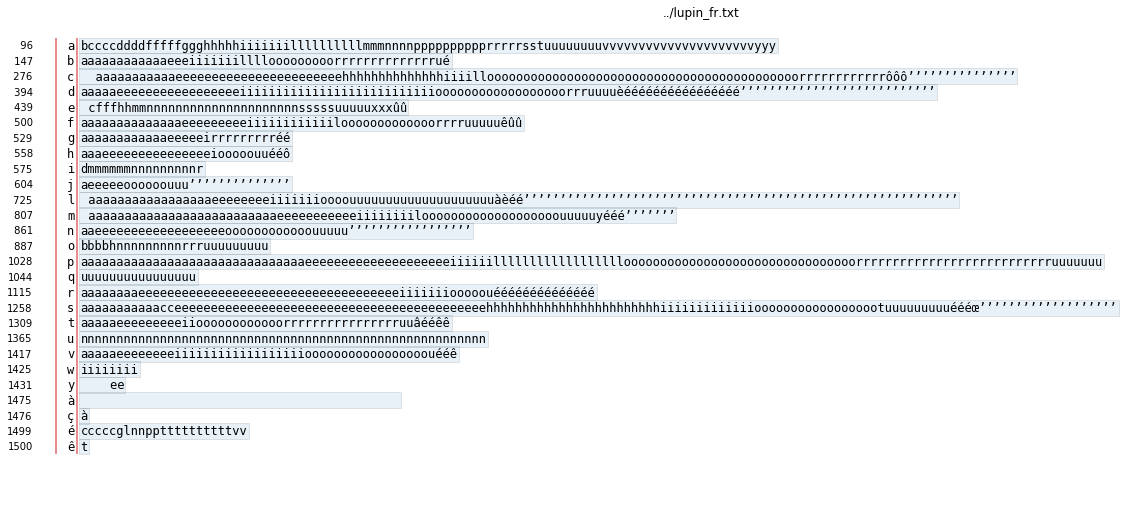

In [5]:
fig, ax, df = stem_graphic('../lupin_fr.txt', ascending=False, caps=False, display=1500,
                           figure_only=False, random_state=42, sort_by='alpha', stop_words=FR);

Many elisions seen in the above two charts. This is much common in French than in English and is rare in Spanish, so, not surprising given that the text is in French. Let's see what word pairs they are part of:

In [6]:
df[df.word.str[1:2]==APOSTROPHE]

,index,word,stem,leaf,ngram
9,11597,n’en,n,’,n’
13,11727,l’état,l,’,l’
18,21827,n’est,n,’,n’
22,21316,c’est,c,’,c’
46,10439,l’endroit,l,’,l’
54,2524,l’on,l,’,l’
63,23176,j’ignore,j,’,j’
65,15921,n’en,n,’,n’
67,2693,d’hésitation,d,’,d’
83,12101,c’est,c,’,c’


Note that there is a difference between a straight quote ('), and a proper typographical apostrophe which is angled (’). If your text does not use the proper typographical form, you will have to run it through something like sed. Be careful not to replace actual quote marks by apostrophes.

In [7]:
res = df[df.word.str[1:2]=='’'].sort_values(by='word')
print(res.word.unique())

['c’est' 'c’était' 'd’abord' 'd’agir' 'd’ailleurs' 'd’annoncer' 'd’autant'
 'd’autre' 'd’autres' 'd’eux' 'd’hommes' 'd’hésitation' 'd’imblevalle'
 'd’influence' 'd’où' 'd’un' 'd’une' 'd’utiliser' 'd’y' 'd’émeraudes'
 'd’être' 'd’œil' 'j’admire' 'j’ai' 'j’en' 'j’ignore' 'j’étais' 'l’a'
 'l’adresse' 'l’affaire' 'l’aie' 'l’air' 'l’ajusta' 'l’album' 'l’alphabet'
 'l’ami' 'l’amie' 'l’anglais' 'l’angoisse' 'l’aplomb' 'l’aurez'
 'l’autorisation' 'l’autre' 'l’avait' 'l’aventure' 'l’eau' 'l’effroyable'
 'l’embarcation' 'l’endroit' 'l’ennemi' 'l’entende' 'l’erreur' 'l’histoire'
 'l’honneur' 'l’idée' 'l’individu' 'l’inquiétude' 'l’insignifiante'
 'l’occasion' 'l’on' 'l’ordinaire' 'l’un' 'l’une' 'l’unique' 'l’échelle'
 'l’écho' 'l’éclairât' 'l’énigme' 'l’épaule' 'l’épouvante' 'l’état' 'l’œil'
 'm’avait' 'm’avez' 'm’avez-vous' 'm’embêter' 'm’ont' 'm’étonner'
 'n’admettait' 'n’agit' 'n’ai' 'n’aurais' 'n’avais' 'n’avez' 'n’effrayait'
 'n’en' 'n’est' 'n’est-ce' 'n’ont' 'n’ose' 'n’y' 'n’était' 's’accen

taking the above list, we’ll plot a stem and leaf, skipping the apostrophe

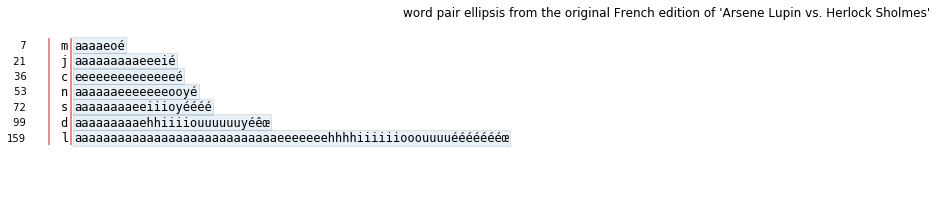

In [8]:
stem_graphic(res, title="word pair ellipsis from the original French edition of 'Arsene Lupin vs. Herlock Sholmes'",
             leaf_skip=1, random_state=121);

### Some observations:

Besides accented letters, we also see typographical ligatures such as o&e (œ, as in _l'œuil_) as first character

Of those starting with _n’_ (a contracted negation _ne_) we see that the word right after the apostrophe most often starts with an _e_, followed closely by _a_. There is also a _y_, which means: _n’y_. It would be interesting to compare the use of y by different authors and different eras in French litterature in its different forms, such as _d’y, n’y, m’y, l’y, s’y,_ and _t’y._

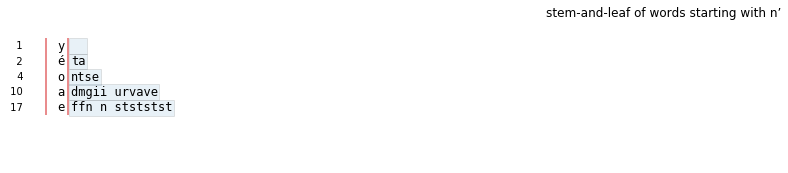

In [9]:
stem_graphic(res, title="stem-and-leaf of words starting with n’", 
             column=['n'],  # look only at words starting with n
             stem_skip=2,  # skip the n’, leaves now become the stem
             leaf_order=2,  # and show pair of leaves
             random_state=121);

Not a lot of repetition. _n'est_ is found 4 times. Everything else are one off.